In [1]:
import sys
sys.path.append('../src')

import pandas as pd
pd.set_option('display.max_columns', None)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from model import plot_model_auc_loss
import matplotlib.pyplot as plt
plt.style.use('dark_background')
plt.rcParams['axes.spines.top']=False
plt.rcParams['axes.spines.right']=False

import seaborn as sns
dark2 = sns.color_palette('Dark2')

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout

import keras_tuner as kt


In [2]:
df_ps = pd.read_csv("../data/processed_pat_sur.csv")

In [3]:
df_ps.head()

,hospital_death,age,bmi,elective_surgery,height,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bun_apache,creatinine_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,resprate_apache,sodium_apache,temp_apache,ventilated_apache,wbc_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,ethnicity_african american,ethnicity_asian,ethnicity_caucasian,ethnicity_hispanic,ethnicity_native american,ethnicity_other-unknown,gender_f,gender_m,icu_type_ccu-cticu,icu_type_csicu,icu_type_cticu,icu_type_cardiac icu,icu_type_micu,icu_type_med-surg icu,icu_type_neuro icu,icu_type_sicu,apache_3j_bodysystem_cardiovascular,apache_3j_bodysystem_gastrointestinal,apache_3j_bodysystem_genitourinary,apache_3j_bodysystem_gynecological,apache_3j_bodysystem_hematological,apache_3j_bodysystem_metabolic,apache_3j_bodysystem_musculoskeletal-skin,apache_3j_bodysystem_neurological,apache_3j_bodysystem_respiratory,apache_3j_bodysystem_sepsis,apache_3j_bodysystem_trauma,apache_2_bodysystem_cardiovascular,apache_2_bodysystem_gastrointestinal,apache_2_bodysystem_haematologic,apache_2_bodysystem_metabolic,apache_2_bodysystem_neurologic,apache_2_bodysystem_renal-genitourinary,apache_2_bodysystem_respiratory,apache_2_bodysystem_trauma,apache_2_bodysystem_undefined diagnoses
0,0,68.0,22.730000,0,180.3,0.541667,73.9,113.0,502.01,0,0,31.0,2.51,3.0,6.0,0,4.0,168.0,118.0,27.4,0,40.0,36.0,134.0,39.3,0,14.1,68.0,37.0,68.0,37.0,119.0,72.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,131.0,73.0,131.0,73.0,39.9,37.2,68.0,63.0,68.0,63.0,119.0,108.0,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,131.0,115.0,131.0,115.0,39.5,37.5,31.0,30.0,8.5,7.4,2.51,2.23,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,0.10,0.05,0,0,1,0,0,0,0,0,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False
1,0,77.0,27.420000,0,160.0,0.927778,70.2,108.0,203.01,0,0,9.0,0.56,1.0,3.0,0,1.0,145.0,120.0,36.9,0,46.0,33.0,145.0,35.1,1,12.7,95.0,31.0,95.0,31.0,118.0,72.0,120.0,38.0,120.0,38.0,32.0,12.0,100.0,70.0,159.0,67.0,159.0,67.0,36.3,35.1,61.0,48.0,61.0,48.0,114.0,100.0,85.0,57.0,85.0,57.0,31.0,28.0,95.0,70.0,95.0,71.0,95.0,71.0,36.3,36.3,11.0,9.0,8.6,8.0,0.71,0.56,145.0,128.0,27.0,26.0,11.3,11.1,36.9,36.1,557.0,487.0,4.2,3.8,145.0,145.0,23.3,12.7,0.47,0.29,0,0,1,0,0,0,0,0,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False
2,0,67.0,27.560000,0,190.5,0.000694,100.0,301.0,403.01,0,0,13.0,0.71,4.0,6.0,0,5.0,156.0,113

In [4]:
# Split the data into X and y
X = df_ps.drop('hospital_death', axis=1)
y = df_ps['hospital_death']

In [5]:
y.value_counts()

hospital_death
0    48461
1     4652
Name: count, dtype: int64

The response variable is imbalanced.

In [6]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=8)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(42490, 134) (10623, 134) (42490,) (10623,)


In [7]:
X_train.head()

,age,bmi,elective_surgery,height,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bun_apache,creatinine_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,resprate_apache,sodium_apache,temp_apache,ventilated_apache,wbc_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,ethnicity_african american,ethnicity_asian,ethnicity_caucasian,ethnicity_hispanic,ethnicity_native american,ethnicity_other-unknown,gender_f,gender_m,icu_type_ccu-cticu,icu_type_csicu,icu_type_cticu,icu_type_cardiac icu,icu_type_micu,icu_type_med-surg icu,icu_type_neuro icu,icu_type_sicu,apache_3j_bodysystem_cardiovascular,apache_3j_bodysystem_gastrointestinal,apache_3j_bodysystem_genitourinary,apache_3j_bodysystem_gynecological,apache_3j_bodysystem_hematological,apache_3j_bodysystem_metabolic,apache_3j_bodysystem_musculoskeletal-skin,apache_3j_bodysystem_neurological,apache_3j_bodysystem_respiratory,apache_3j_bodysystem_sepsis,apache_3j_bodysystem_trauma,apache_2_bodysystem_cardiovascular,apache_2_bodysystem_gastrointestinal,apache_2_bodysystem_haematologic,apache_2_bodysystem_metabolic,apache_2_bodysystem_neurologic,apache_2_bodysystem_renal-genitourinary,apache_2_bodysystem_respiratory,apache_2_bodysystem_trauma,apache_2_bodysystem_undefined diagnoses
28981,69.0,31.972318,1,170.0,2.662500,92.4,308.0,1207.01,1,0,7.0,0.60,3.0,6.0,0,3.0,127.0,91.0,28.2,1,57.0,29.0,138.0,36.8,1,14.90,67.0,41.0,67.0,41.0,91.0,80.0,73.0,57.0,73.0,57.0,29.0,12.0,100.0,92.0,127.0,94.0,127.0,94.0,37.1,36.7,62.0,55.0,62.0,55.0,91.0,90.0,73.0,68.0,73.0,68.0,23.0,12.0,99.0,98.0,127.0,105.0,127.0,105.0,37.1,36.9,8.0,7.0,8.1,8.1,0.69,0.60,127.0,105.0,20.0,20.0,13.3,8.6,39.0,27.0,245.0,227.0,4.5,3.8,140.0,138.0,16.50,11.50,0.01,0.00,0,0,0,0,0,0,0,0,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
34168,43.0,42.292992,0,167.6,0.169444,118.8,113.0,501.05,0,0,9.0,0.51,4.0,6.0,0,5.0,184.0,101.0,42.2,0,134.0,39.0,132.0,35.8,1,13.75,123.0,78.0,123.0,78.0,100.0,41.0,134.0,89.0,134.0,89.0,47.0,16.0,98.0,82.0,181.0,125.0,181.0,125.0,36.2,35.8,112.0,93.0,112.0,93.0,91.0,59.0,127.0,106.0,127.0,106.0,26.0,19.0,98.0,89.0,172.0,135.0,172.0,135.0,36.2,36.2,9.0,9.0,8.8,8.8,0.51,0.51,207.0,147.0,26.0,26.0,13.7,13.7,42.2,42.2,294.0,294.0,4.7,4.7,132.0,132.0,13.75,13.75,0.05,0.03,0,0,0,0,1,0,0,0,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False
17273,30.0,21.527821,0,152.4,-0.004167,50.0,123.0,702.01,0,0,18.0,0.76,4.0,6.0,0,5.0,298.0

In [8]:
# Standardize the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_std = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_std = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Reset index to ensure alignment
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

#### Model 1 - Baseline Neural Network model

In [9]:
model1 = Sequential()
model1.add(Input(shape=(X_train_std.shape[-1],)))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(16, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         8,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,265 (44.00 KB)

 Trainable params: 11,265 (44.00 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# define metrics
metrics = [
    keras.metrics.Precision(name='precision'),
    keras.metrics.Recall(name='recall'),
    keras.metrics.AUC(curve='ROC')
]

# compile the model
model1.compile(optimizer=keras.optimizers.Adam(0.01),
               loss='binary_crossentropy',
               metrics=metrics)

epochs = 20
batch_size = 32
history = model1.fit(X_train_std.values, y_train, validation_data=(X_test_std.values, y_test), epochs=epochs, batch_size=batch_size)

Epoch 1/20
1328/1328 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - auc: 0.7944 - loss: 0.2462 - precision: 0.5612 - recall: 0.0842 - val_auc: 0.8667 - val_loss: 0.2166 - val_precision: 0.7310 - val_recall: 0.1162
Epoch 2/20
1328/1328 ━━━━━━━━━━━━━━━━━━━━ 1s 781us/step - auc: 0.8588 - loss: 0.2195 - precision: 0.6700 - recall: 0.2020 - val_auc: 0.8696 - val_loss: 0.2082 - val_precision: 0.7182 - val_recall: 0.1732
Epoch 3/20
1328/1328 ━━━━━━━━━━━━━━━━━━━━ 1s 784us/step - auc: 0.8627 - loss: 0.2135 - precision: 0.6811 - recall: 0.2172 - val_auc: 0.8743 - val_loss: 0.2088 - val_precision: 0.5963 - val_recall: 0.3191
Epoch 4/20
1328/1328 ━━━━━━━━━━━━━━━━━━━━ 1s 836us/step - auc: 0.8643 - loss: 0.2143 - precision: 0.6860 - recall: 0.2242 - val_auc: 0.8732 - val_loss: 0.2097 - val_precision: 0.6466 - val_recall: 0.2588
Epoch 5/20
1328/1328 ━━━━━━━━━━━━━━━━━━━━ 1s 817us/step - auc: 0.8700 - loss: 0.2076 - precision: 0.7175 - recall: 0.2055 - val_auc: 0.8735 - val_loss: 0.2167 - val_precision: 0.6946 - v

Validation precision is 65.63% meaning that when the model predicts a positive outcome (hospital_death = 1), it is correct 65% of the time. 

However validation recall is too low. At 23.25%, it means that the model identifies only 23% of positive instances (hospital_death=1) in the dataset.

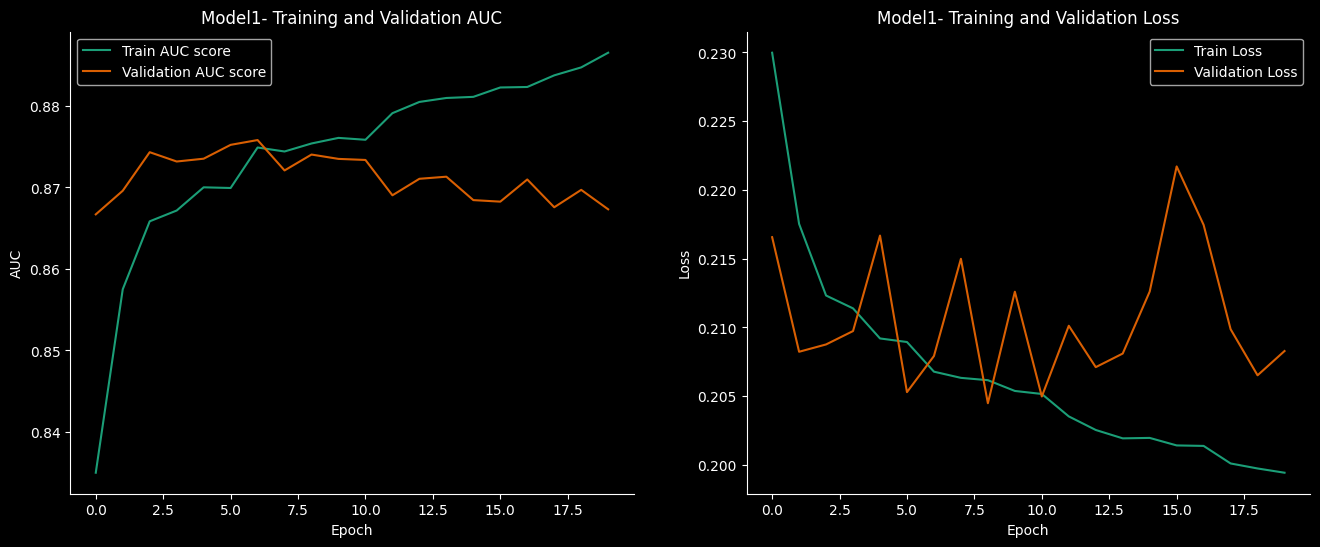

In [11]:
train_auc = history.history['auc']
train_loss = history.history['loss']

val_auc = history.history['val_auc']
val_loss = history.history['val_loss']

plot_model_auc_loss(modelname = 'Model1', train_auc=train_auc, val_auc=val_auc, train_loss=train_loss, val_loss=val_loss, epochs=epochs)

#### Model 2 - using Dropout Layer

In [12]:
model2 = Sequential()
model2.add(Input(shape=(X_train_std.shape[-1],)))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dropout(0.25))
model2.add(Dense(16, activation='relu'))
model2.add(Dropout(0.25))
model2.add(Dense(1, activation='sigmoid'))

model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │         8,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,265 (44.00 KB)

 Trainable params: 11,265 (44.00 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# compile the model
model2.compile(optimizer=keras.optimizers.Adam(0.01),
              loss='binary_crossentropy',
              metrics=metrics)

In [14]:
history2 = model2.fit(X_train_std.values, y_train, validation_data=(X_test_std.values, y_test), epochs=epochs, batch_size=batch_size)

Epoch 1/20
1328/1328 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - auc: 0.8287 - loss: 0.2573 - precision: 0.5985 - recall: 0.1145 - val_auc: 0.8660 - val_loss: 0.2152 - val_precision: 0.7436 - val_recall: 0.0636
Epoch 2/20
1328/1328 ━━━━━━━━━━━━━━━━━━━━ 1s 871us/step - auc: 0.8404 - loss: 0.2309 - precision: 0.6050 - recall: 0.1264 - val_auc: 0.8583 - val_loss: 0.2264 - val_precision: 0.6115 - val_recall: 0.2796
Epoch 3/20
1328/1328 ━━━━━━━━━━━━━━━━━━━━ 1s 866us/step - auc: 0.8514 - loss: 0.2199 - precision: 0.6359 - recall: 0.1781 - val_auc: 0.8701 - val_loss: 0.2178 - val_precision: 0.7745 - val_recall: 0.0866
Epoch 4/20
1328/1328 ━━━━━━━━━━━━━━━━━━━━ 1s 849us/step - auc: 0.8453 - loss: 0.2289 - precision: 0.6822 - recall: 0.1394 - val_auc: 0.8689 - val_loss: 0.2103 - val_precision: 0.7429 - val_recall: 0.1425
Epoch 5/20
1328/1328 ━━━━━━━━━━━━━━━━━━━━ 1s 868us/step - auc: 0.8532 - loss: 0.2210 - precision: 0.6174 - recall: 0.1663 - val_auc: 0.8707 - val_loss: 0.2141 - val_precision: 0.6540 - v

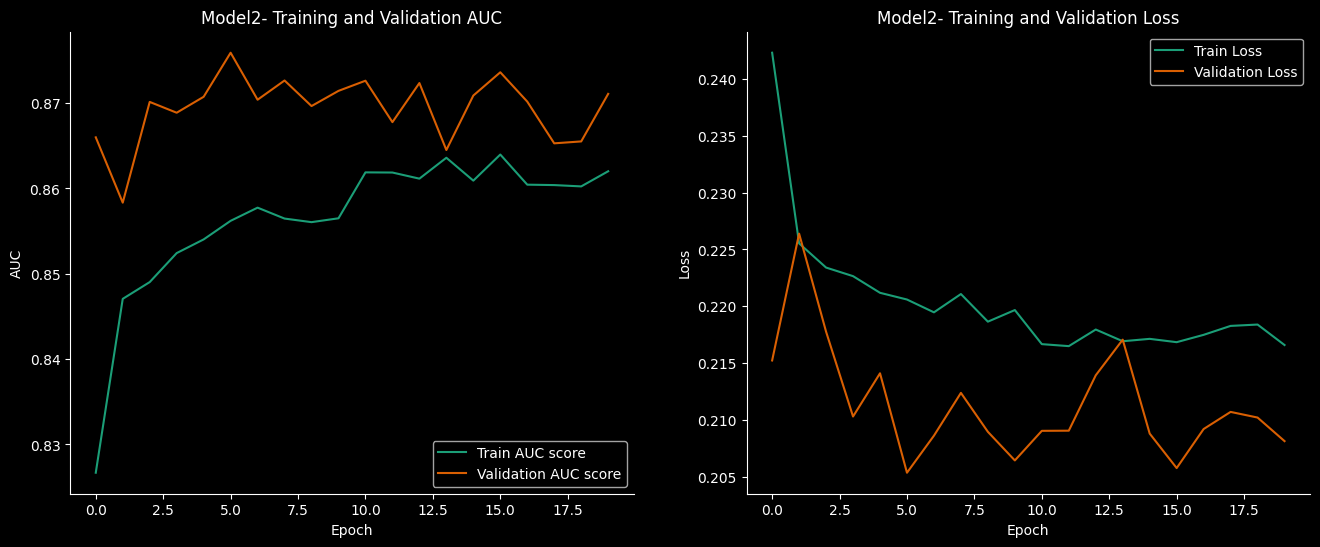

In [15]:
train_auc = history2.history['auc']
train_loss = history2.history['loss']

val_auc = history2.history['val_auc']
val_loss = history2.history['val_loss']

plot_model_auc_loss(modelname = 'Model2', train_auc=train_auc, val_auc=val_auc, train_loss=train_loss, val_loss=val_loss, epochs=epochs)

Even after using Dropout layer, the model is performing poorly in predicting the postive outcomes. The validation recall is 25%.

#### Model 3 - Addressing class imbalance 

In [16]:
model3 = Sequential()
model3.add(Input(shape=(X_train_std.shape[-1],)))
model3.add(Dense(64, activation='relu'))
model3.add(Dense(32, activation='relu'))
model3.add(Dense(16, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))

In [17]:
model3.compile(optimizer=keras.optimizers.Adam(),
               loss='binary_crossentropy',
               metrics=metrics)

class_weight = {0: 0.5, 1: 5}

In [18]:
history3 = model3.fit(X_train_std.values, y_train, validation_data=(X_test_std.values, y_test), epochs=epochs, batch_size=batch_size, class_weight=class_weight)

Epoch 1/20
1328/1328 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - auc: 0.7853 - loss: 0.4800 - precision: 0.2647 - recall: 0.5193 - val_auc: 0.8673 - val_loss: 0.4920 - val_precision: 0.2251 - val_recall: 0.8147
Epoch 2/20
1328/1328 ━━━━━━━━━━━━━━━━━━━━ 1s 823us/step - auc: 0.8629 - loss: 0.4139 - precision: 0.2526 - recall: 0.7884 - val_auc: 0.8730 - val_loss: 0.5048 - val_precision: 0.2228 - val_recall: 0.8300
Epoch 3/20
1328/1328 ━━━━━━━━━━━━━━━━━━━━ 1s 812us/step - auc: 0.8676 - loss: 0.4077 - precision: 0.2589 - recall: 0.7837 - val_auc: 0.8748 - val_loss: 0.5797 - val_precision: 0.1983 - val_recall: 0.8739
Epoch 4/20
1328/1328 ━━━━━━━━━━━━━━━━━━━━ 1s 810us/step - auc: 0.8719 - loss: 0.4003 - precision: 0.2651 - recall: 0.7985 - val_auc: 0.8758 - val_loss: 0.4459 - val_precision: 0.2438 - val_recall: 0.8180
Epoch 5/20
1328/1328 ━━━━━━━━━━━━━━━━━━━━ 1s 810us/step - auc: 0.8807 - loss: 0.3850 - precision: 0.2715 - recall: 0.8090 - val_auc: 0.8750 - val_loss: 0.4180 - val_precision: 0.2730 - v

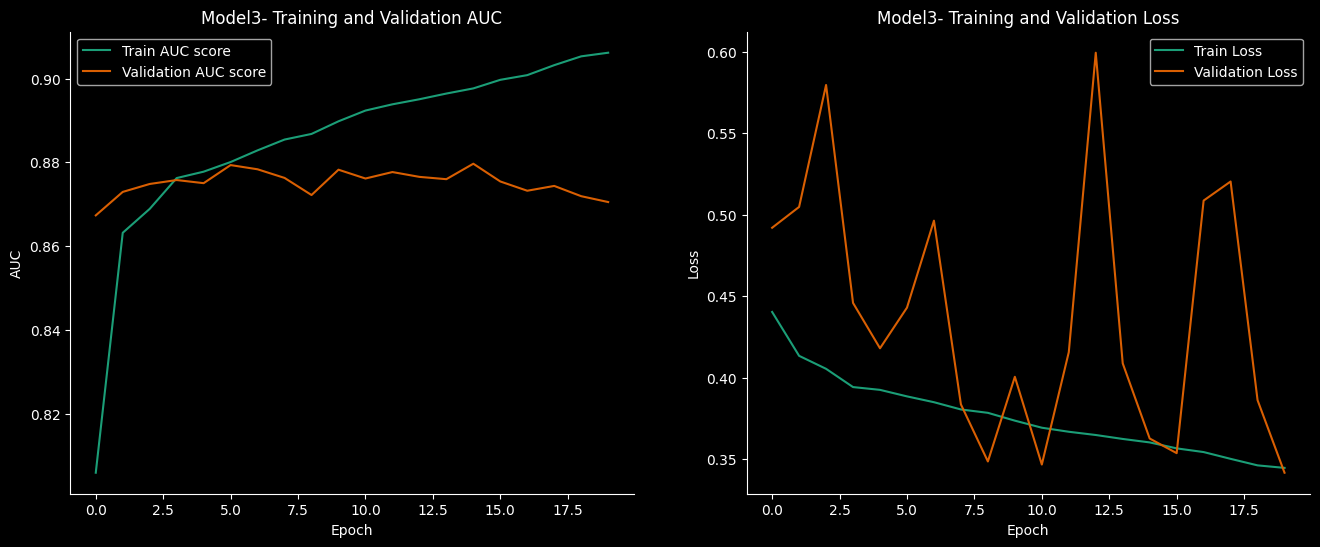

In [19]:
train_auc = history3.history['auc']
train_loss = history3.history['loss']

val_auc = history3.history['val_auc']
val_loss = history3.history['val_loss']

plot_model_auc_loss(modelname = 'Model3', train_auc=train_auc, val_auc=val_auc, train_loss=train_loss, val_loss=val_loss, epochs=epochs)

The validation recall is now at 75%. There is a substantial improvement in the model performance.

#### Model4 - Hyperparameter Tuning using keras-tuner

In [20]:
def model_builder(hp):
    model = keras.Sequential()
    model.add(Input(shape=(X_train_std.shape[-1],)))
    model.add(keras.layers.Flatten())

    # Tune the number of units in the first Dense layer
    # Choose an optimal value between 32-512
    hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
    
    model.add(keras.layers.Dense(units=hp_units, activation='relu'))
    model.add(keras.layers.Dense(units=hp_units, activation='relu'))
    model.add(keras.layers.Dense(1, activation='sigmoid'))

    # Tune the learning rate for the optimizer
    # Choose an optimal value from 0.01, 0.001, or 0.0001
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    metrics = [
        keras.metrics.Precision(name="precision"),
        keras.metrics.Recall(name="recall"),
        keras.metrics.AUC(curve='ROC')]

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                    loss=keras.losses.BinaryCrossentropy(),
                    metrics=metrics)

    return model

In [21]:
tuner = kt.RandomSearch(
    model_builder,
    objective='val_loss',
    max_trials=5)

# using early stopping to stop training the model when optimal value of recall and loss values are achieved.
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_recall', patience=5)

Reloading Tuner from .\untitled_project\tuner0.json


In [22]:
tuner.search(X_train_std.values, y_train, epochs=30, validation_data = (X_test_std.values, y_test), callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer is {best_hps.get('learning_rate')}.
""")


The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 384 and the optimal learning rate for the optimizer is 0.001.



#### Final model using the best hyperparameters

In [23]:
model4 = Sequential()
model4.add(Input(shape=(X_train_std.shape[-1],)))
model4.add(Dense(384, activation='relu'))
model4.add(Dense(384, activation='relu'))
model4.add(Dense(1, activation='sigmoid'))

model4.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 384)            │        51,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 384)            │       147,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │           385 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 200,065 (781.50 KB)

 Trainable params: 200,065 (781.50 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model4.compile(optimizer=keras.optimizers.Adam(0.001),
               loss='binary_crossentropy',
               metrics=metrics)

In [25]:
history4 = model4.fit(X_train_std.values, y_train, validation_data = (X_test_std.values, y_test), epochs=epochs, batch_size=batch_size)

Epoch 1/20
1328/1328 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - auc: 0.8247 - loss: 0.2415 - precision: 0.3715 - recall: 0.3850 - val_auc: 0.8657 - val_loss: 0.2093 - val_precision: 0.7569 - val_recall: 0.1502
Epoch 2/20
1328/1328 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - auc: 0.8638 - loss: 0.2166 - precision: 0.6709 - recall: 0.2322 - val_auc: 0.8683 - val_loss: 0.2075 - val_precision: 0.7078 - val_recall: 0.2390
Epoch 3/20
1328/1328 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - auc: 0.8771 - loss: 0.2040 - precision: 0.6893 - recall: 0.2752 - val_auc: 0.8746 - val_loss: 0.2040 - val_precision: 0.7000 - val_recall: 0.2610
Epoch 4/20
1328/1328 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - auc: 0.8790 - loss: 0.2022 - precision: 0.6791 - recall: 0.2677 - val_auc: 0.8790 - val_loss: 0.2019 - val_precision: 0.7229 - val_recall: 0.2489
Epoch 5/20
1328/1328 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - auc: 0.8751 - loss: 0.2045 - precision: 0.6917 - recall: 0.2622 - val_auc: 0.8763 - val_loss: 0.2029 - val_precision: 0.6349 - val_recal

After using the number of units and the learning rate extracted from hyperparameter tuning -

The model is more generalized.

Validation loss has reduced down to 25.32%

Precision and Recall score have improved slightly.



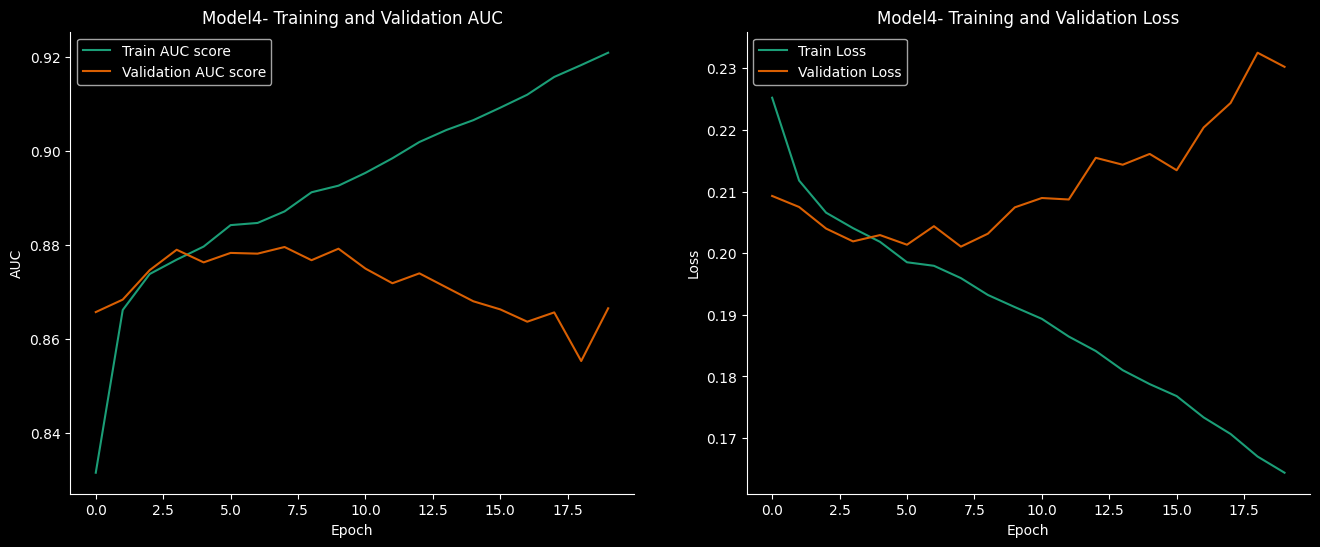

In [26]:
train_auc = history4.history['auc']
train_loss = history4.history['loss']

val_auc = history4.history['val_auc']
val_loss = history4.history['val_loss']

plot_model_auc_loss(modelname = 'Model4', train_auc=train_auc, val_auc=val_auc, train_loss=train_loss, val_loss=val_loss, epochs=epochs)